**Names and Ids:**

**Musber Ahmed Sadman (2215151038)**

**Maharaj Hossain Tanim (2215151040)**

**Habibul Bashar (2215151046)**

**Tanvir Rana Rabbi (2215151048)**

### **Simulation of the Impact of Poverty on Crime Rates**


Objective:
1.   Define and calculate poverty: Based on a user-defined income threshold, it identifies individuals who are considered poor.
2.   Calculate crime rates: It calculates the overall crime rate and then specifically the crime rates for both poor and non-poor groups.
3.   Compare crime distributions: It uses a Kolmogorov-Smirnov (KS) test to assess whether the distributions of crime rates for the poor and non-poor populations are statistically different.
4.   Visualize the relationship: It visualizes the average crime rate across different income bins to show how crime rate changes with income level.



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
# Input parameters
poverty_threshold = float(input("Enter poverty income threshold (e.g., 30000): "))
file_path = "/content/synthetic_income_crime_data.csv"

Enter poverty income threshold (e.g., 30000): 5000


In [14]:
# Load data
df = pd.read_csv(file_path)
if 'income' not in df.columns or 'committed_crime' not in df.columns:
    raise ValueError("CSV must contain 'income' and 'committed_crime' columns.")

In [15]:
df

,income,committed_crime
0,59934.283060,0
1,47234.713977,0
2,62953.770762,0
3,80460.597128,0
4,45316.932506,0
...,...,...
9995,76022.041260,0
9996,10033.100657,0
9997,35893.665522,0
9998,59915.311460,0


In [16]:
# Data processing
df['income'] = df['income'].clip(lower=0)
df['is_poor'] = df['income'] < poverty_threshold

poverty_rate = df['is_poor'].mean()
crime_rate = df['committed_crime'].mean()
poor_crime_rate = df[df['is_poor']]['committed_crime'].mean()
non_poor_crime_rate = df[~df['is_poor']]['committed_crime'].mean()

In [17]:
# KS test
if df['is_poor'].any() and (~df['is_poor']).any():
    ks_stat, p_value = stats.ks_2samp(df[df['is_poor']]['committed_crime'],
                                      df[~df['is_poor']]['committed_crime'])
else:
    ks_stat, p_value = 0, 1

In [18]:
# Crime rate by income bin
bin_size = 5000
bins = np.arange(0, df['income'].max() + bin_size, bin_size)
df['income_bin'] = pd.cut(df['income'], bins)
crime_bins = df.groupby('income_bin')['committed_crime'].mean().fillna(0)

<ipython-input-18-2664e3b7bae9>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_bins = df.groupby('income_bin')['committed_crime'].mean().fillna(0)


In [19]:
# Display results
print("\n--- Data-Based Results ---")
print(f"Poverty Rate: {poverty_rate:.2f}")
print(f"Overall Crime Rate: {crime_rate:.2f}")
print(f"Crime Rate (Poor): {poor_crime_rate:.2f}")
print(f"Crime Rate (Non-Poor): {non_poor_crime_rate:.2f}")
print(f"KS Test Statistic: {ks_stat:.3f}")
print(f"KS Test P-Value: {p_value:.3f}")
print(f"{'Conclusion: Data distributions are' if p_value > 0.05 else 'Conclusion: Data distributions are not'} likely from the same distribution.")



--- Data-Based Results ---
Poverty Rate: 0.01
Overall Crime Rate: 0.07
Crime Rate (Poor): 0.16
Crime Rate (Non-Poor): 0.07
KS Test Statistic: 0.095
KS Test P-Value: 0.249
Conclusion: Data distributions are likely from the same distribution.


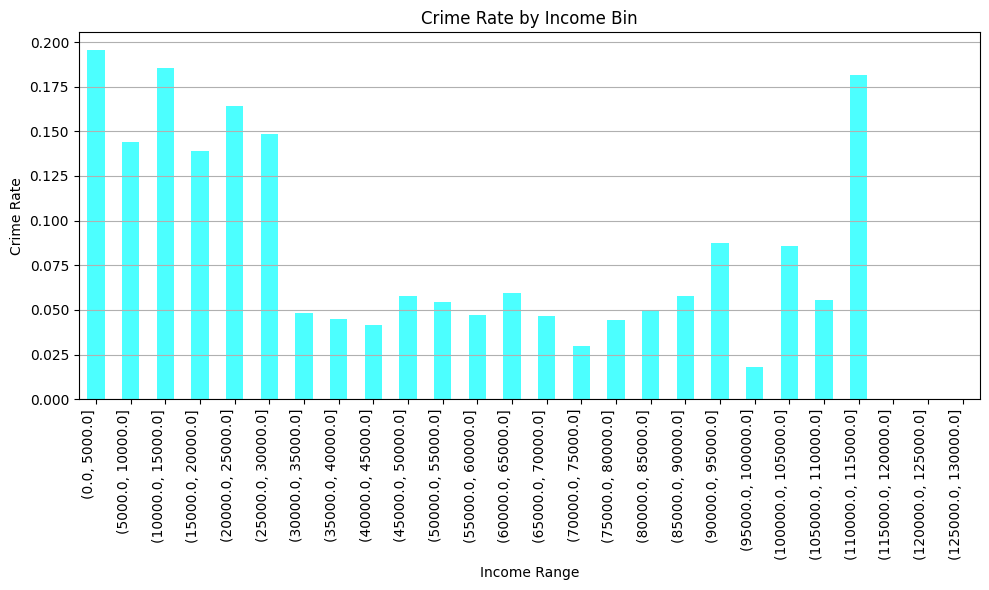

In [20]:
# Plot
plt.figure(figsize=(10, 6))
crime_bins.plot(kind='bar', color='cyan', alpha=0.7)
plt.title('Crime Rate by Income Bin')
plt.xlabel('Income Range')
plt.ylabel('Crime Rate')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()